# PCA with S-curve dataset

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve

import torch

from model.pca import PCA

plt.style.use("seaborn-darkgrid")

# Data

## Sample

In [2]:
n_dim = 500

x, t = make_s_curve(n_dim, random_state=0)
x = torch.tensor(x, dtype=torch.float32)

## Plot

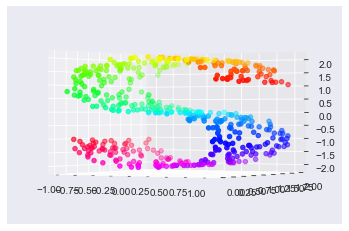

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x.numpy()[:, 0], x.numpy()[:, 1], zs=x.numpy()[:, 2],
           c=t, cmap=plt.get_cmap("hsv"))
ax.view_init(elev=0, azim=-60)
plt.show()

# Model

In [4]:
x_dim = 3
z_dim = 2

pca = PCA(x_dim, z_dim, n_dim)

In [7]:
evidence_list = pca.inference({"x": x}, max_iter=30)

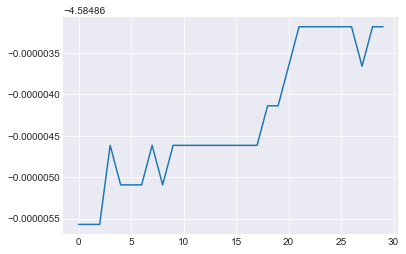

In [8]:
plt.plot(evidence_list)
plt.show()

## Transform

In [9]:
z_pca = pca.transform()
x_pca = pca.inverse_transform()

# Plot

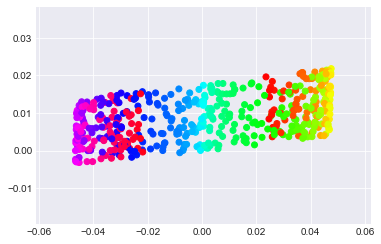

In [10]:
plt.figure()
plt.scatter(z_pca.numpy()[:, 0], z_pca.numpy()[:, 1],
            c=t, cmap=plt.get_cmap("hsv"))
plt.show()

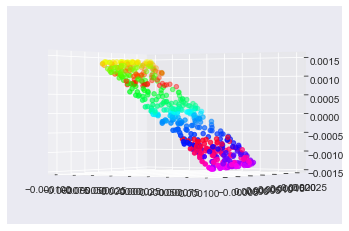

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_pca.numpy()[:, 0], x_pca.numpy()[:, 1], zs=x_pca.numpy()[:, 2],
           c=t, cmap=plt.get_cmap("hsv"))
ax.view_init(elev=0, azim=-60)
plt.show()